In [329]:
from scipy.stats.qmc import LatinHypercube as LHSampler
from matplotlib import pyplot as plt
import numpy as np
from src.utils import plotLHS, concat, H, F
from src.eLHS import *
import json
from math import floor, ceil

# setup sampler
LHS = LHSampler(d = 2)
err = 1e-9

Grade (mode 3):  1.0


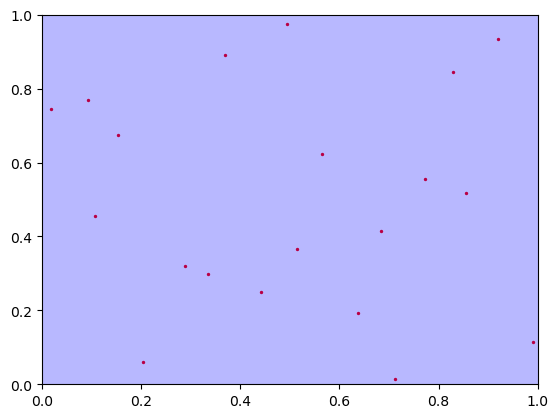

In [108]:
# could be interesting which distribution the PeLHS grade has while varying M and N
N1, M1 = 20, 14
ss2 = LHS.random(N1)
plotLHS(ss2, grid=False, highlight=True)
print("Grade (mode 3): ", grade(ss2))

Partial grade 1:  0.5588235294117647
Partial grade 3:  0.5588235294117647


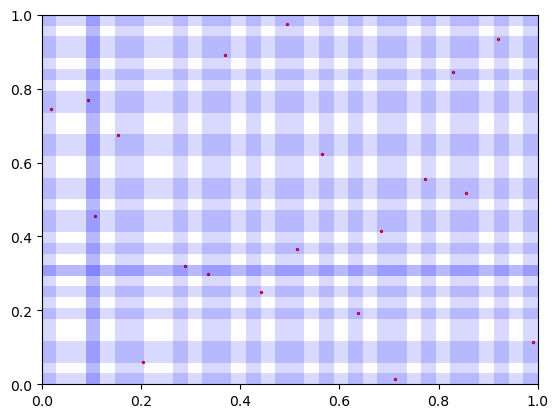

In [109]:
# plotting the partial-eLHS ("Partiale")
pss2 = empty_expansion(ss2, M1)
plotLHS(pss2, grid=False, highlight=True)
print("Partial grade 1: ", grade(pss2, n = N1 + M1, mode=1))
print("Partial grade 3: ", grade(ss2, n = N1 + M1, mode=3))


LHS grade: 	 20.0
PeLHS grade: 	 0.5588235294117647
eLHS grade: 	 0.9705882352941176
Total Upgrade: 	 0.4117647058823529  | Expected:  0.4117647058823529  |  ✅


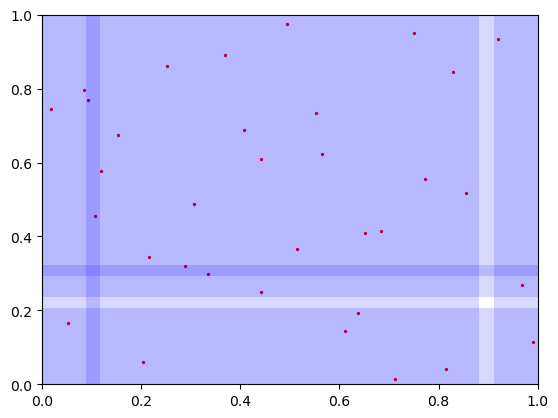

In [150]:
exp = eLHS(ss2, M1)
elhs2 = concat(ss2, exp["expansion"])
plotLHS(elhs2, False, True)

exp_up = M1/(N1 + M1)
print("LHS grade: \t", grade(ss2) * N1)
print("PeLHS grade: \t", grpss2 := grade(ss2, n = N1 + M1))
print("eLHS grade: \t", grelhs2 := exp['grade'])
print("Total Upgrade: \t" , grelhs2 - grpss2, " | Expected: ", exp_up, " | ", 
      ("✅" if -err < grelhs2 - grpss2 - exp_up < err else "❌"))


### TEST PLAYGROUND

Limited Sample Size Problem

## Experiment: max gr(s, Q)

In [37]:
N, P = 100, 3
s = LHS.random(N)

In [38]:
K = 4
qs = np.arange(0, K * N + 1)
ys = np.array([ grade(s, n = N + q, mode = 3) + q/(N + q) for q in qs ])

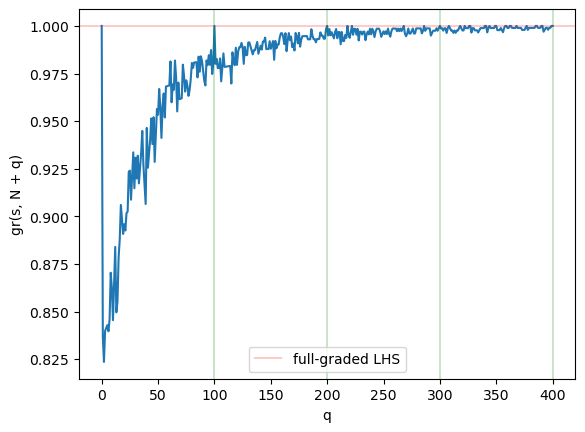

In [39]:

# plt.scatter(qs, ys, s = 1)
plt.plot(qs, ys)
plt.xlabel("q")
plt.ylabel("gr(s, N + q)")
plt.axhline(1, color='red', linestyle='-', linewidth = 0.3, label = "full-graded LHS")
for k in range(1, K + 1):
    plt.axvline(k * N, color='green', linestyle='-', linewidth = 0.3)
plt.legend()
plt.show()


In [40]:
# finding the optimal Qs
xys = np.column_stack([qs, ys])
Qs = np.array(xys[xys[:, 1] == 1] [:, 0], dtype=int)
print(Qs)


[  0 100 200 218 222 268 286 300 308 318 322 326 327 340 341 344 349 350
 358 359 362 363 368 377 385 386 390 391 399 400]


In [41]:
painQs = Qs[Qs[:] % N != 0]

if len(painQs) > 0:
    for q in painQs:
        expansion = eLHS(s, q)
        print("-" * 20)
        print("N: ", N, "\tQ: ", q)
        print("Is it a full-grade expansion?", expansion["grade"], " | ", 
            "✅" if expansion["grade"] == 1.0 else "❌")
else:
    print(" ⚠️ We found no non-trivial expansion")
    

--------------------
N:  100 	Q:  218
Is it a full-grade expansion? 1.0  |  ✅
--------------------
N:  100 	Q:  222
Is it a full-grade expansion? 1.0  |  ✅
--------------------
N:  100 	Q:  268
Is it a full-grade expansion? 1.0  |  ✅
--------------------
N:  100 	Q:  286
Is it a full-grade expansion? 1.0  |  ✅
--------------------
N:  100 	Q:  308
Is it a full-grade expansion? 1.0  |  ✅
--------------------
N:  100 	Q:  318
Is it a full-grade expansion? 1.0  |  ✅
--------------------
N:  100 	Q:  322
Is it a full-grade expansion? 1.0  |  ✅
--------------------
N:  100 	Q:  326
Is it a full-grade expansion? 1.0  |  ✅
--------------------
N:  100 	Q:  327
Is it a full-grade expansion? 1.0  |  ✅
--------------------
N:  100 	Q:  340
Is it a full-grade expansion? 1.0  |  ✅
--------------------
N:  100 	Q:  341
Is it a full-grade expansion? 1.0  |  ✅
--------------------
N:  100 	Q:  344
Is it a full-grade expansion? 1.0  |  ✅
--------------------
N:  100 	Q:  349
Is it a full-grade expansi

### 1000 samples LSSP experiment

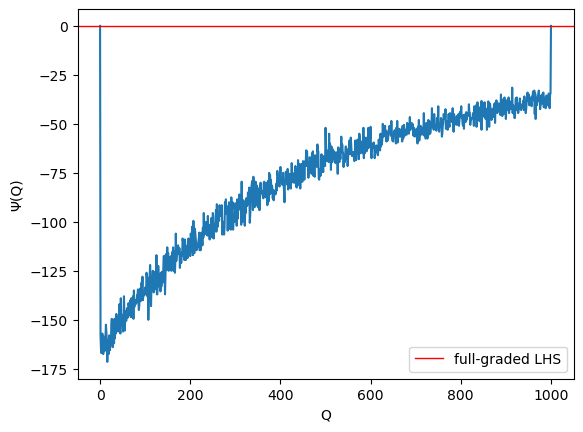

In [42]:

with open('data/PSI-1000-experiment.json') as f:
    e = json.load(f)
    xys = np.array(e['xys'])
    plt.plot(xys[:, 0], xys[:, 1])
    plt.xlabel("Q")
    plt.ylabel("Ψ(Q)")
    plt.axhline(0, color='red', linestyle='-', linewidth = 1, label = "full-graded LHS")
    plt.legend()
    plt.show()

### Expanded Grade Prediction

In [392]:
def expandedGrade(lhs: np.ndarray, M: int):
    N, P = lhs.shape
    return 1 - np.sum(overlaps(lhs, M)) / (P * (N + M))

def overlaps(lhs: np.ndarray, M: int):
    N, P = lhs.shape
    ovs = np.zeros((P))
    for j in range(P):
        xs = np.sort(lhs[:, j])
        for i in range(N - 1):
            ovs[j] += H(ceil(xs[i] * (N + M)) / (N + M) - xs[i+1])
    return ovs


Overlaps:  [1. 2.]


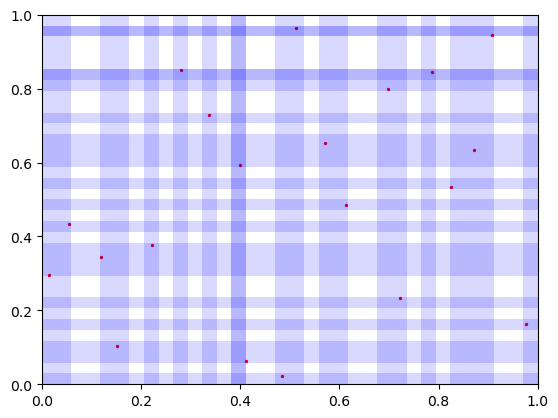

In [394]:
N3, M3 = 20, 14
ss3 = LHS.random(N3)
# plotting the empty expansion of ss3
plotLHS(empty_expansion(ss3, M3), grid = False, highlight = True)
print("Overlaps: ", overlaps(ss3, M3))

In [393]:
prediction = expandedGrade(ss3, M3)
exp3 = eLHS(ss3, M3)
elhs3 = concat(ss3, exp3["expansion"])
print(prediction, exp3["grade"], "✅" if -err < prediction - exp3["grade"] < err else "❌")

0.9852941176470589 0.9852941176470589 ✅
